In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load the dataset
df1 = pd.read_csv(r"C:\Users\abhay\OneDrive\Desktop\movies.csv")
df2 = pd.read_csv(r"C:\Users\abhay\OneDrive\Desktop\ratings.csv")
df = pd.merge(df1, df2, on='movieId')

In [3]:
# Print the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [4]:
# Drop 'customerID' column
df.drop(["movieId", "genres", "userId", "timestamp"], axis=1, inplace=True)

In [5]:
df.duplicated().sum()

24710605

In [6]:
# Check for duplicates
duplicates = df[df.duplicated(keep=False)]


# Remove duplicates
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame without duplicates
df_no_duplicates

,title,rating
0,Toy Story (1995),3.5
1,Toy Story (1995),4.0
2,Toy Story (1995),3.0
10,Toy Story (1995),5.0
12,Toy Story (1995),2.0
...,...,...
25000090,We (2018),1.5
25000091,Window of the Soul (2001),3.0
25000092,Bad Poems (2018),4.5
25000093,A Girl Thing (2001),3.0


In [7]:
df_no_duplicates.isnull().sum()

title     0
rating    0
dtype: int64

In [34]:
X = df_no_duplicates.drop(['rating'], axis=1)
y = df_no_duplicates['rating']

In [35]:
X.shape

(289490, 1)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_no_duplicates['title'])

In [37]:
tfidf_matrix.shape

(289490, 33641)

In [38]:
y.value_counts()

rating
3.0    40089
3.5    37173
4.0    33747
2.5    32246
2.0    28425
5.0    27112
4.5    24326
0.5    24067
1.0    21787
1.5    20518
Name: count, dtype: int64

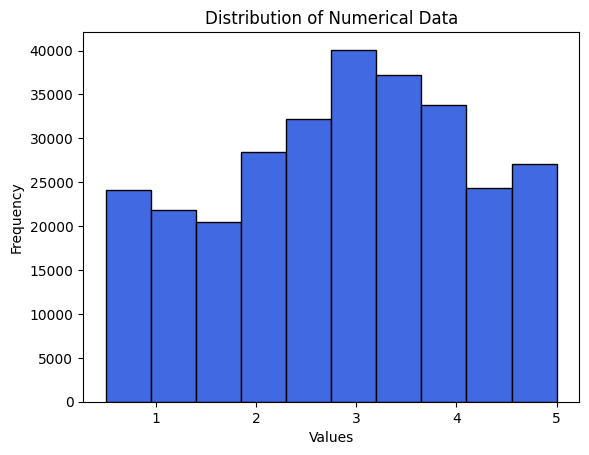

In [17]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(y, color='royalblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Numerical Data')

# Display the histogram
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.3, random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor  # Regression model
from sklearn.svm import SVR  # Regression model
from sklearn.neighbors import KNeighborsRegressor  # Regression model
from sklearn.linear_model import LinearRegression  # Regression model
from sklearn.tree import DecisionTreeRegressor  # Regression model
from sklearn.metrics import mean_squared_error, r2_score

# Define the regression models and their hyperparameter grids
regressors = {
    'Random Forest Regressor': {
        'model': RandomForestRegressor(),
        'param_grid': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20],
        }
    },
    'SVR': {
        'model': SVR(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
        }
    },
    'K-Nearest Neighbors Regressor': {
        'model': KNeighborsRegressor(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
        }
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'param_grid': {}
    },
    'Decision Tree Regressor': {
        'model': DecisionTreeRegressor(),
        'param_grid': {
            'max_depth': [None, 10, 20],
        }
    }
}

# Model evaluation and metrics
results = {}
for name, config in regressors.items():
    clf = config['model']
    param_grid = config['param_grid']

    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Cross-validation scores (negative mean squared error)
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'best_model': best_model,
        'best_params': grid_search.best_params_,
        'mean_cv_neg_mean_squared_error': np.mean(cv_scores),
        'mean_squared_error': mse,
        'r2_score': r2,
    }

# Print the results
for name, result in results.items():
    print(f'{name}:')
    print(f'Best Parameters: {result["best_params"]}')
    print(f'Mean Cross-Validation Negative Mean Squared Error: {result["mean_cv_neg_mean_squared_error"]}')
    print(f'Mean Squared Error on Test Set: {result["mean_squared_error"]}')
    print(f'R-squared (R2) Score on Test Set: {result["r2_score"]}')
    print()
